In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scikitplot as skplot
from sklearn.metrics import confusion_matrix
from scipy import stats
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('train.csv')
# df.head()
df = df.dropna()
df_look=df

In [3]:
df[218:219]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
218,Male,92000,Others,1,Divorced,Employed,No,Rural,Yes,3


In [4]:
df[df['Risk Status']==5]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
383,Female,14000,Bachelor,2,Divorced,Retired,No,Rural,Yes,5
583,Male,24000,Others,3,Separated,Unemployed,No,Semi-urban,No,5
704,Male,15000,Others,1,Single,Unemployed,No,Rural,No,5
1062,Male,22000,Others,2,Single,Retired,No,Rural,No,5
2153,Female,29000,Others,2,Divorced,Others,No,Rural,Yes,5
2209,Female,20000,Others,3,Married,Retired,No,Rural,Yes,5
2331,Female,47000,Others,3,Widowed,Others,No,Semi-urban,Yes,5
2721,Female,25000,Others,2,Divorced,Others,No,Semi-urban,Yes,5
2796,Male,17000,Others,1,Single,Retired,No,Rural,Yes,5


In [5]:
df = df.drop(columns =   ['Gender','Credit']) ## ตัด feature

In [6]:
def dummyEncoder(data,columns):
    for i in columns:   
        dummies = pd.get_dummies(df[i])
        data = pd.concat([data,dummies],axis = 1)
        data = data.drop( columns= i)
    return data
        

columns =  ['Education','Marital Status','Employment Status'	,'Mortgage'	,'Resident'] ## feature ที่ทำการ ont hot
df = dummyEncoder(df,columns)

In [7]:
sample =df.sample(frac=0.80, random_state=14)

In [8]:
df_look[df_look['Risk Status']==1]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
37,Female,117000,Doctorate,0,Divorced,Self-employed,Yes,Urban,Yes,1
89,Female,108000,Doctorate,1,Separated,Employed,Yes,Urban,Yes,1
223,Female,151000,Doctorate,0,Widowed,Self-employed,Yes,Urban,Yes,1
225,Male,103000,Master,0,Separated,Employed,Yes,Urban,No,1
239,Female,100000,Doctorate,0,Separated,Self-employed,Yes,Semi-urban,Yes,1
351,Male,173000,Doctorate,1,Single,Self-employed,Yes,Urban,Yes,1
454,Male,154000,Doctorate,1,Divorced,Self-employed,Yes,Urban,Yes,1
457,Male,80000,Doctorate,0,Separated,Employed,Yes,Urban,Yes,1
549,Male,83000,Doctorate,0,Divorced,Self-employed,Yes,Urban,Yes,1
647,Female,179000,Doctorate,1,Widowed,Self-employed,Yes,Urban,Yes,1


In [9]:
df_look[775:776]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
776,Female,73000,Master,3,Divorced,Others,No,Rural,Yes,4


In [10]:
df_look[2724:2733]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
2729,Female,23000,Others,1,Single,Others,No,Rural,Yes,4
2730,Female,62000,Bachelor,1,Widowed,Employed,Yes,Urban,No,2
2731,Female,25000,Bachelor,0,Widowed,Self-employed,Yes,Rural,No,3
2732,Male,24000,Bachelor,2,Single,Part-time,Yes,Rural,Yes,4
2733,Female,24000,Master,2,Separated,Employed,Yes,Urban,No,2
2734,Male,85000,Doctorate,1,Separated,Others,No,Urban,No,2
2735,Male,57000,Bachelor,1,Divorced,Others,Yes,Semi-urban,Yes,3
2736,Female,75000,Others,1,Married,Self-employed,Yes,Semi-urban,Yes,3
2737,Female,43000,Bachelor,2,Single,Self-employed,Yes,Semi-urban,No,3


In [11]:
#  split
X_train = df
y_train = X_train.pop("Risk Status")
col = list(X_train.columns)

In [12]:
X_train

,Income,Dependents,Bachelor,Doctorate,Master,Others,Divorced,Married,Separated,Single,...,Others,Part-time,Retired,Self-employed,Unemployed,No,Yes,Rural,Semi-urban,Urban
0,28000,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,42000,2,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,52000,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,64000,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,126000,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,115000,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2801,47000,3,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2802,22000,2,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2803,42000,3,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [13]:
sample[sample['Risk Status']==1]

,Income,Dependents,Risk Status,Bachelor,Doctorate,Master,Others,Divorced,Married,Separated,...,Others,Part-time,Retired,Self-employed,Unemployed,No,Yes,Rural,Semi-urban,Urban
1220,82000,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
37,117000,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
225,103000,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1183,97000,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1791,89000,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
454,154000,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1525,127000,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1960,112000,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
872,146000,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
549,83000,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [14]:
y_train.value_counts()

3    1279
2     925
4     553
1      34
5       9
Name: Risk Status, dtype: int64

In [15]:
sm = SMOTE(random_state=0)
x = np.array(X_train)
X_train_res, y_train_res = sm.fit_resample(x , y_train)

In [16]:
x_train_res_use = pd.DataFrame(X_train_res, 
             columns=col)

In [17]:
x_train_res_use

,Income,Dependents,Bachelor,Doctorate,Master,Others,Divorced,Married,Separated,Single,...,Others,Part-time,Retired,Self-employed,Unemployed,No,Yes,Rural,Semi-urban,Urban
0,28000,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,42000,2,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,52000,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,64000,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,126000,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,19897,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6391,24687,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6392,20743,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6393,19480,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [18]:
y_train_res.value_counts()

3    1279
2    1279
5    1279
1    1279
4    1279
Name: Risk Status, dtype: int64

In [19]:
dlook = pd.DataFrame(X_train_res,y_train_res)

In [20]:
from sklearn.preprocessing import MinMaxScaler as Scaler
X_train = x_train_res_use.astype('float64')
sc = Scaler()
X_sc = sc.fit_transform(X_train)

df_sc = pd.DataFrame(X_sc, columns = X_train .columns)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_sc,y_train_res)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-tes

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:

logreg2=LogisticRegression( C = 1000.0,penalty="l2")
logreg2.fit(X_sc,y_train_res)
cvs = cross_val_score(logreg2,X_sc,y_train_res,cv = 10)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [24]:
print("{:.3f}".format(cvs.mean()))

0.977


In [25]:
df = pd.read_csv('train.csv')
# df.head()
df = df.dropna()

In [26]:
df[383:384]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
383,Female,14000,Bachelor,2,Divorced,Retired,No,Rural,Yes,5


In [27]:
df[df['Risk Status']==5]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
383,Female,14000,Bachelor,2,Divorced,Retired,No,Rural,Yes,5
583,Male,24000,Others,3,Separated,Unemployed,No,Semi-urban,No,5
704,Male,15000,Others,1,Single,Unemployed,No,Rural,No,5
1062,Male,22000,Others,2,Single,Retired,No,Rural,No,5
2153,Female,29000,Others,2,Divorced,Others,No,Rural,Yes,5
2209,Female,20000,Others,3,Married,Retired,No,Rural,Yes,5
2331,Female,47000,Others,3,Widowed,Others,No,Semi-urban,Yes,5
2721,Female,25000,Others,2,Divorced,Others,No,Semi-urban,Yes,5
2796,Male,17000,Others,1,Single,Retired,No,Rural,Yes,5


In [28]:
df_test = pd.read_csv('test.csv')

In [29]:
df_test_copy=pd.read_csv('test.csv')

In [30]:
df_test = df_test.drop(columns=['Gender','Credit'])

In [31]:
def dummyEncoder2(data,columns):
    for i in columns:   
        dummies = pd.get_dummies(df_test[i])
        data = pd.concat([data,dummies],axis = 1)
        data = data.drop( columns= i)
    return data
        

columns =  ['Education','Marital Status','Employment Status','Mortgage','Resident'] ## feature ที่ทำการ ont hot
df_test = dummyEncoder2(df_test,columns)

In [32]:
df_test.head()

,Income,Dependents,Risk Status,Bachelor,Doctorate,Master,Others,Divorced,Married,Separated,...,Others,Part-time,Retired,Self-employed,Unemployed,No,Yes,Rural,Semi-urban,Urban
0,51000,1,NaN,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
1,48000,2,NaN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,26000,2,NaN,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,32000,1,NaN,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,110000,1,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
df_test=df_test.drop(columns='Risk Status')

In [34]:
df_test = df_test.astype('float64')
sc = Scaler()
df_test_sc = sc.fit_transform(df_test)

In [35]:
df_test_sc

array([[0.23312883, 0.25      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21472393, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0797546 , 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.06134969, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01840491, 0.75      , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.12883436, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [36]:
y_predict_test = logreg2.predict(df_test_sc)

In [37]:
y_predict_test=pd.DataFrame(y_predict_test,columns=['Risk Status'])

In [38]:
y_predict_test

,Risk Status
0,3
1,3
2,4
3,4
4,2
...,...
345,2
346,2
347,4
348,4


In [39]:
df_test_copy=df_test_copy.drop(columns='Risk Status')

In [40]:
df_test_copy = pd.concat([df_test_copy, y_predict_test], axis=1)

In [41]:
df_test_copy.to_csv('test_full.csv', index = False, header=True)

In [42]:
compare = pd.read_excel('solution.xlsx')

In [43]:
df_look[df_look['Risk Status']==5]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
383,Female,14000,Bachelor,2,Divorced,Retired,No,Rural,Yes,5
583,Male,24000,Others,3,Separated,Unemployed,No,Semi-urban,No,5
704,Male,15000,Others,1,Single,Unemployed,No,Rural,No,5
1062,Male,22000,Others,2,Single,Retired,No,Rural,No,5
2153,Female,29000,Others,2,Divorced,Others,No,Rural,Yes,5
2209,Female,20000,Others,3,Married,Retired,No,Rural,Yes,5
2331,Female,47000,Others,3,Widowed,Others,No,Semi-urban,Yes,5
2721,Female,25000,Others,2,Divorced,Others,No,Semi-urban,Yes,5
2796,Male,17000,Others,1,Single,Retired,No,Rural,Yes,5


In [44]:
df_test_copy[df_test_copy['Risk Status']==5]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
120,Male,21000,Others,1,Single,Others,No,Rural,No,5
202,Male,16000,Others,1,Single,Others,No,Rural,No,5
249,Female,26000,Others,2,Widowed,Others,No,Semi-urban,Yes,5


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

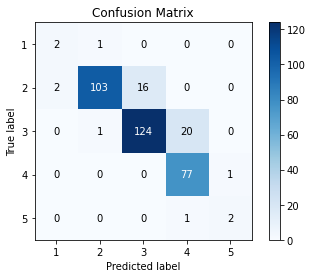

In [45]:
skplot.metrics.plot_confusion_matrix(compare['Risk Status'],df_test_copy['Risk Status'])

In [46]:
compare[compare['Risk Status']!=df_test_copy['Risk Status']]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,3
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,3
11,Female,22000,Others,1,Married,Part-time,Yes,Rural,Yes,3
44,Male,63000,Others,2,Single,Self-employed,Yes,Semi-urban,Yes,3
68,Male,50000,Master,1,Widowed,Self-employed,Yes,Semi-urban,Yes,2
78,Male,59000,Bachelor,1,Widowed,Employed,No,Rural,No,3
81,Male,76000,Doctorate,0,Single,Employed,Yes,Urban,Yes,2
82,Male,88000,Bachelor,1,Single,Self-employed,Yes,Semi-urban,Yes,2
84,Male,54000,Master,1,Single,Self-employed,Yes,Semi-urban,Yes,2
86,Male,64000,Others,1,Married,Employed,No,Rural,No,3


In [47]:
compare[(compare['Risk Status']!=df_test_copy['Risk Status'])&(compare['Risk Status']==4)].count()

Gender               1
Income               1
Education            1
Dependents           1
Marital Status       1
Employment Status    1
Mortgage             1
Resident             1
Credit               1
Risk Status          1
dtype: int64

In [48]:
compare[compare['Risk Status']!=df_test_copy['Risk Status']]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,3
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,3
11,Female,22000,Others,1,Married,Part-time,Yes,Rural,Yes,3
44,Male,63000,Others,2,Single,Self-employed,Yes,Semi-urban,Yes,3
68,Male,50000,Master,1,Widowed,Self-employed,Yes,Semi-urban,Yes,2
78,Male,59000,Bachelor,1,Widowed,Employed,No,Rural,No,3
81,Male,76000,Doctorate,0,Single,Employed,Yes,Urban,Yes,2
82,Male,88000,Bachelor,1,Single,Self-employed,Yes,Semi-urban,Yes,2
84,Male,54000,Master,1,Single,Self-employed,Yes,Semi-urban,Yes,2
86,Male,64000,Others,1,Married,Employed,No,Rural,No,3


In [49]:
df_test_copy[df_test_copy['Risk Status']==3]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,3
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,3
6,Female,19000,Bachelor,0,Widowed,Self-employed,Yes,Rural,Yes,3
12,Female,30000,Bachelor,0,Separated,Self-employed,No,Rural,No,3
16,Male,34000,Doctorate,2,Separated,Retired,No,Urban,Yes,3
...,...,...,...,...,...,...,...,...,...,...
331,Female,54000,Bachelor,1,Widowed,Others,Yes,Urban,No,3
333,Male,31000,Bachelor,1,Divorced,Others,Yes,Urban,Yes,3
334,Female,95000,Doctorate,3,Widowed,Self-employed,Yes,Rural,Yes,3
341,Female,21000,Master,1,Married,Retired,Yes,Semi-urban,Yes,3


In [50]:
df_test_copy[df_test_copy['Risk Status']==2]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,2
5,Male,53000,Doctorate,1,Widowed,Employed,Yes,Semi-urban,No,2
13,Female,97000,Master,2,Widowed,Self-employed,Yes,Urban,Yes,2
21,Male,49000,Master,0,Married,Others,Yes,Urban,No,2
22,Female,65000,Master,1,Widowed,Self-employed,Yes,Semi-urban,No,2
...,...,...,...,...,...,...,...,...,...,...
339,Female,47000,Doctorate,1,Widowed,Employed,Yes,Semi-urban,No,2
343,Male,21000,Doctorate,0,Married,Unemployed,Yes,Urban,No,2
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes,2
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes,2


In [51]:
df_test_copy[df_test_copy['Risk Status']==1]

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
45,Male,116000,Master,0,Separated,Self-employed,Yes,Urban,Yes,1
81,Male,76000,Doctorate,0,Single,Employed,Yes,Urban,Yes,1
211,Male,117000,Doctorate,0,Single,Self-employed,Yes,Semi-urban,Yes,1
340,Female,96000,Doctorate,0,Single,Self-employed,Yes,Urban,Yes,1


In [52]:
df_test_copy.to_csv("D:/test_Logistic.csv")